In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Our target variable is 'Exited'. 0 indicates customers remained with the bank and 1 means the customer exited the bank.

In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
print('Number of rows is', data.shape[0])
print('Number of colums is', data.shape[1])


Number of rows is 10000
Number of colums is 14


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
data.duplicated().sum()

0

## Drop Irrelevant Features 

We can drop RowNumber, CustomerId, and Surname because they have no effect on our prediction. 

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data= data.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)
#axis = 1, means we're dropping columns

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data

We need to perform encoding on our categorical Data.
Geography and Gender needs to be change to numberical values.

In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

We'll encode France to 0, Spain to 1, and Germany to 2

There's no relationship orders between these countries and to avoid this relationship interperetation going to convert this geography values into binary vector. Binary vector, meaning we will convert tthe column into three columns. Why three? Becuase in this column we have three unique values.

We'll use get_dummies method to complete this task. And to avoid highly correlated effects, we place drop_first=True, in our method. 

In [17]:
data =pd.get_dummies(data,drop_first = True)

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Handling Imbalanced

We'll look at our target data and see if there's any imbalance. 

In [19]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

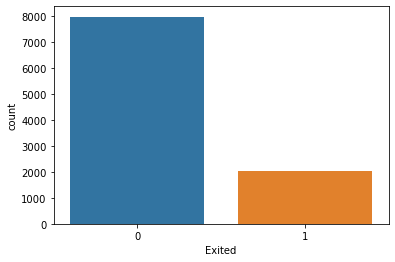

In [20]:
sns.countplot(data['Exited'])

From our graph, we can see there is an imbalance in our target data set. There's an uneven distrubtion of observations.

In [21]:
X = data.drop('Exited', axis= 1)
y = data['Exited']

In [22]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


## We'll handle imbalance here

We can use two techniques over sampling and under sampling. Wehn we are using imbalanced data set we can over sample the minority class using replacement, which is over sampling. Similarly, we can randomly delete rows from majority class to match this with minority class is called under sampling. The disadvantage of this, under sampling, we can lose a lot of valuable data. Thus, that's why over sampling is a better choice. 
 
 We'll conduct over sampling with smote method. Smote method aims to balance class distrubution by randomly increasing minority class examples by replacing them. Smote synthesixes new minority instances between existing minority instances.
Smote uses virtual training records by linear interpolation for the minority class.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
x_res, y_res = SMOTE().fit_resample(X,y)

In [41]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Now, we have even distribution of maturity class and minority class.

Now we change our X and y as x_res and y_res.

See Below

## Splitting The Dataset into The Training Set and Test Set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size = 0.20, random_state= 42)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc =StandardScaler()

In [48]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [49]:
x_test

array([[-1.22575005, -1.18038474,  0.03175767, ..., -0.58629073,
        -0.45477267, -0.83185388],
       [-0.45400867,  0.00356125, -0.33219894, ...,  1.70563843,
        -0.45477267, -0.83185388],
       [ 0.35034151, -0.98306041,  1.48758411, ..., -0.58629073,
         2.19890082, -0.83185388],
       ...,
       [ 0.11121037, -0.29242525,  0.39571428, ..., -0.58629073,
        -0.45477267, -0.83185388],
       [ 1.11121329,  1.08884508,  0.39571428, ...,  1.70563843,
        -0.45477267, -0.83185388],
       [-1.10618449,  0.49687208,  0.75967089, ..., -0.58629073,
        -0.45477267, -0.83185388]])

since exited has 1 or 0 values, this is a classification problem. Thus, we'll use different classification algorithmns

## Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression 

In [51]:
log =LogisticRegression()

In [52]:
log.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred1 = log.predict(x_test)

In [54]:
from sklearn.metrics import  accuracy_score

In [55]:
accuracy_score(y_test,y_pred1)

0.7878217200251099

In [57]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [58]:
precision_score(y_test,y_pred1)

0.7718536887786733

model's ability to correctly predict the positives out of all the positive predictions it made

In [59]:
recall_score(y_test,y_pred1)

0.8016741790083709

Model's ability to correctly predict the positives out of actual positives. 

In [60]:
f1_score(y_test,y_pred1)

0.786481364497789

model score as a function of precision and recall score 

## SVC

In [61]:
from sklearn import svm

In [62]:
svm = svm.SVC()

In [63]:
svm.fit(x_train,y_train)

SVC()

In [64]:
y_predict2 = svm.predict(x_test)

In [65]:
accuracy_score(y_test,y_predict2)

0.8411801632140615

In [67]:
precision_score(y_test,y_predict2)

0.8294524858401511

In [68]:
f1_score(y_test,y_predict2)

0.8389560789306174

## KNeighbors Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
y_predict3= knn.predict(x_test)

In [73]:
accuracy_score(y_test,y_predict3)

0.8170119271814187

In [74]:
precision_score(y_test,y_predict3)

0.7957317073170732

In [75]:
f1_score(y_test,y_predict3)

0.817413091136862

## Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
DTC =  DecisionTreeClassifier()

In [78]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_predict4 = DTC.predict(x_test)

In [82]:
accuracy_score(y_test,y_predict4)

0.7928436911487758

In [83]:
precision_score(y_test,y_predict4)

0.7788881948782012

## Random Forest Classifer

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
RFC =  RandomForestClassifier()

In [88]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
y_predict5 = RFC.predict(x_test)

In [90]:
accuracy_score(y_test,y_predict5)

0.8637790332705587

In [91]:
precision_score(y_test,y_predict5)

0.8552380952380952

## Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
GBC = GradientBoostingClassifier()

GBC.fit(x_train,y_train)

In [95]:
y_predict6 = GBC.predict(x_test)

In [96]:
accuracy_score(y_test,y_predict6)

0.8383553044569994

In [97]:
precision_score(y_test,y_predict6)

0.8374512353706112

## Visiualizing of Models 

In [98]:
Final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DTC','RFC','GBC'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_predict2),
                                accuracy_score(y_test,y_predict3),
                                accuracy_score(y_test,y_predict4),
                                 accuracy_score(y_test,y_predict5),
                                 accuracy_score(y_test,y_predict6)
                                ]})

In [101]:
Final_data

,Models,ACC
0,LR,0.787822
1,SVC,0.841180
2,KNN,0.817012
3,DTC,0.792844
4,RFC,0.863779
5,GBC,0.838355


<AxesSubplot:xlabel='Models', ylabel='ACC'>

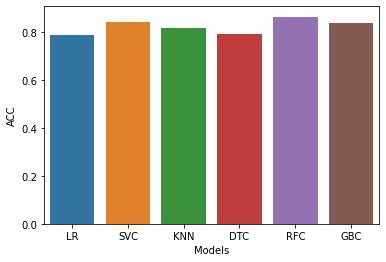

In [102]:
sns.barplot(x= Final_data['Models'], y= Final_data['ACC'])

Our base model for our data set is Random Forest Classifier, according to our graph.

In [103]:
Final_data_p = pd.DataFrame({'Models':['LR','SVC','KNN','DTC','RFC','GBC'],
                          'ACC':[precision_score(y_test,y_pred1),
                                 precision_score(y_test,y_predict2),
                                precision_score(y_test,y_predict3),
                                precision_score(y_test,y_predict4),
                                 precision_score(y_test,y_predict5),
                                 precision_score(y_test,y_predict6)
                                ]})

In [104]:
Final_data_p

,Models,ACC
0,LR,0.771854
1,SVC,0.829452
2,KNN,0.795732
3,DTC,0.778888
4,RFC,0.855238
5,GBC,0.837451


<AxesSubplot:xlabel='Models', ylabel='ACC'>

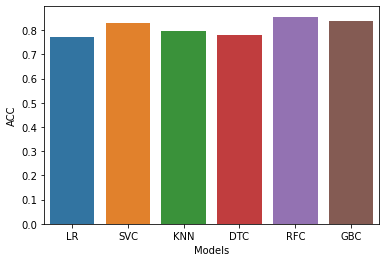

In [105]:
sns.barplot(x=Final_data_p['Models'], y= Final_data_p['ACC'])

Thus, we can see that RFC is the best model for our data

## Save Base Model

In [107]:
x_res = sc.fit_transform(x_res)

In [109]:
RFC.fit(x_res,y_res)
#trained on entire dataset

RandomForestClassifier()

In [110]:
import joblib

In [111]:
joblib.dump(RFC,'Churn_pred_model')

['Churn_pred_model']

In [112]:
model = joblib.load('Churn_pred_model')

Now we can perform predictions

In [113]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [115]:
model.predict([[619,42,2,0.0,0,0,0,101348.00,0,0,0]])

array([1])

Thus, from our result this customer would leave this bank.